## 1. 方波的傅里叶展开

系数验证 (前 5 项):
n=0: a_n ≈ 0.0000, b_n ≈ 0.0000 (理论 b_n: 0.0000)
n=1: a_n ≈ 0.0000, b_n ≈ 1.2732 (理论 b_n: 1.2732)
n=2: a_n ≈ 0.0000, b_n ≈ 0.0000 (理论 b_n: 0.0000)
n=3: a_n ≈ -0.0000, b_n ≈ 0.4244 (理论 b_n: 0.4244)
n=4: a_n ≈ -0.0000, b_n ≈ -0.0000 (理论 b_n: 0.0000)
n=5: a_n ≈ 0.0000, b_n ≈ 0.2546 (理论 b_n: 0.2546)


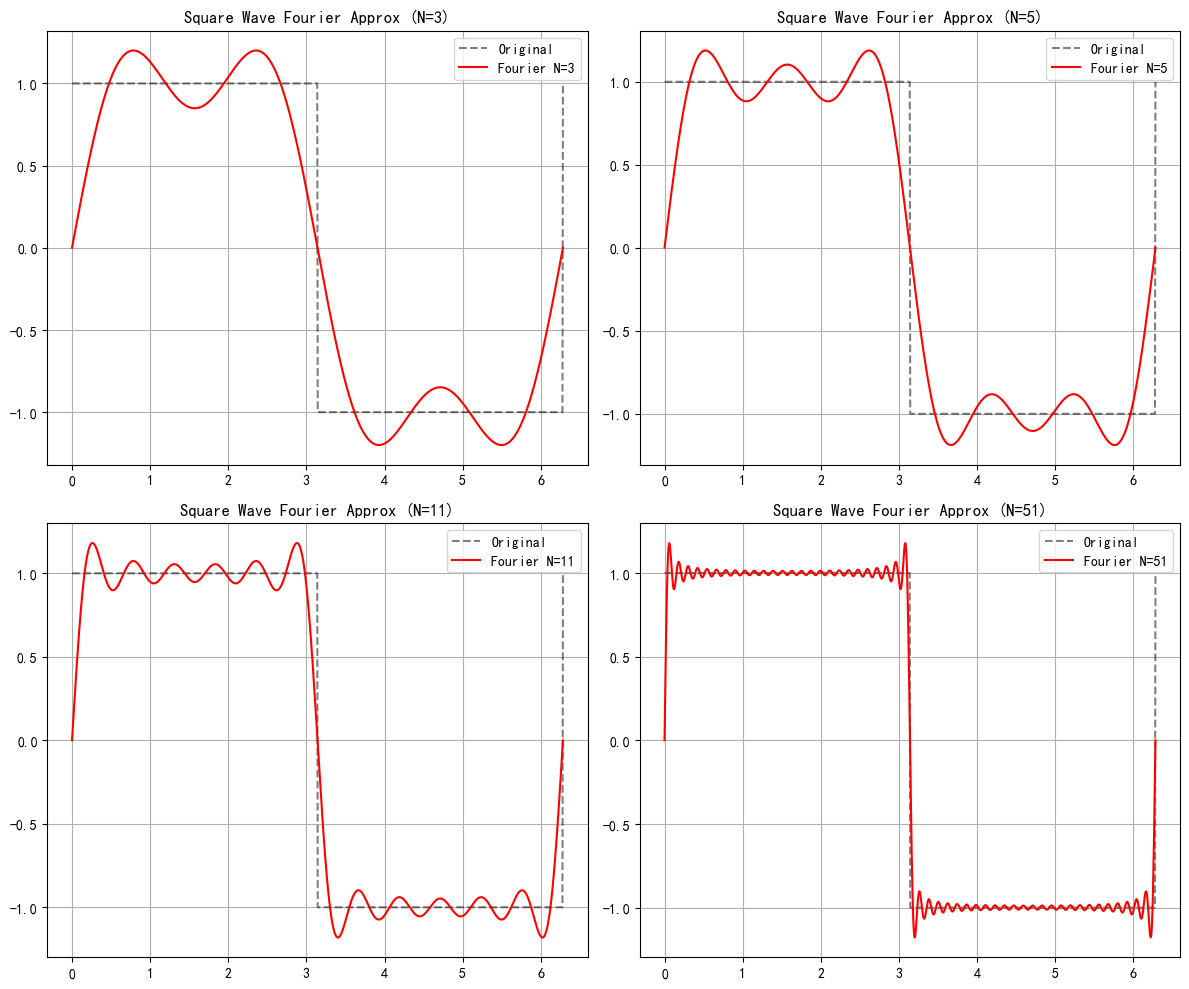

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 设置绘图风格，支持中文显示（如果环境支持）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans'] 
plt.rcParams['axes.unicode_minus'] = False

# 定义方波函数 (周期 2pi)
def square_wave(x):
    # 将 x 映射到 [0, 2pi]
    x = x % (2 * np.pi)
    if 0 <= x < np.pi:
        return 1
    else:
        return -1

# 向量化方波函数以便绘图
v_square_wave = np.vectorize(square_wave)

# 验证系数 (数值积分)
def verify_coefficients(n_max=5):
    print("系数验证 (前 {} 项):".format(n_max))
    for n in range(n_max + 1):
        # 计算 an: (1/pi) * int(f(x)*cos(nx))
        an, _ = quad(lambda x: square_wave(x) * np.cos(n*x), 0, 2*np.pi)
        an = an / np.pi
        
        # 计算 bn: (1/pi) * int(f(x)*sin(nx))
        bn, _ = quad(lambda x: square_wave(x) * np.sin(n*x), 0, 2*np.pi)
        bn = bn / np.pi
        
        # 理论值
        bn_theory = 0
        if n > 0 and n % 2 != 0:
            bn_theory = 4 / (n * np.pi)
            
        print(f"n={n}: a_n ≈ {an:.4f}, b_n ≈ {bn:.4f} (理论 b_n: {bn_theory:.4f})")

verify_coefficients()

# 定义方波的傅里叶级数近似函数
def fourier_square_approx(x, N):
    result = 0
    # a0 = 0, an = 0
    # bn = 4/(n*pi) for odd n
    for n in range(1, N + 1, 2):
        bn = 4 / (n * np.pi)
        result += bn * np.sin(n * x)
    return result

# 绘图
x_vals = np.linspace(0, 2*np.pi, 1000)
original_y = v_square_wave(x_vals)

N_values = [3, 5, 11, 51]

plt.figure(figsize=(12, 10))

for i, N in enumerate(N_values):
    plt.subplot(2, 2, i+1)
    approx_y = fourier_square_approx(x_vals, N)
    plt.plot(x_vals, original_y, 'k--', label='Original', alpha=0.5)
    plt.plot(x_vals, approx_y, 'r-', label=f'Fourier N={N}')
    plt.title(f'Square Wave Fourier Approx (N={N})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## 2. 三角波的傅里叶展开


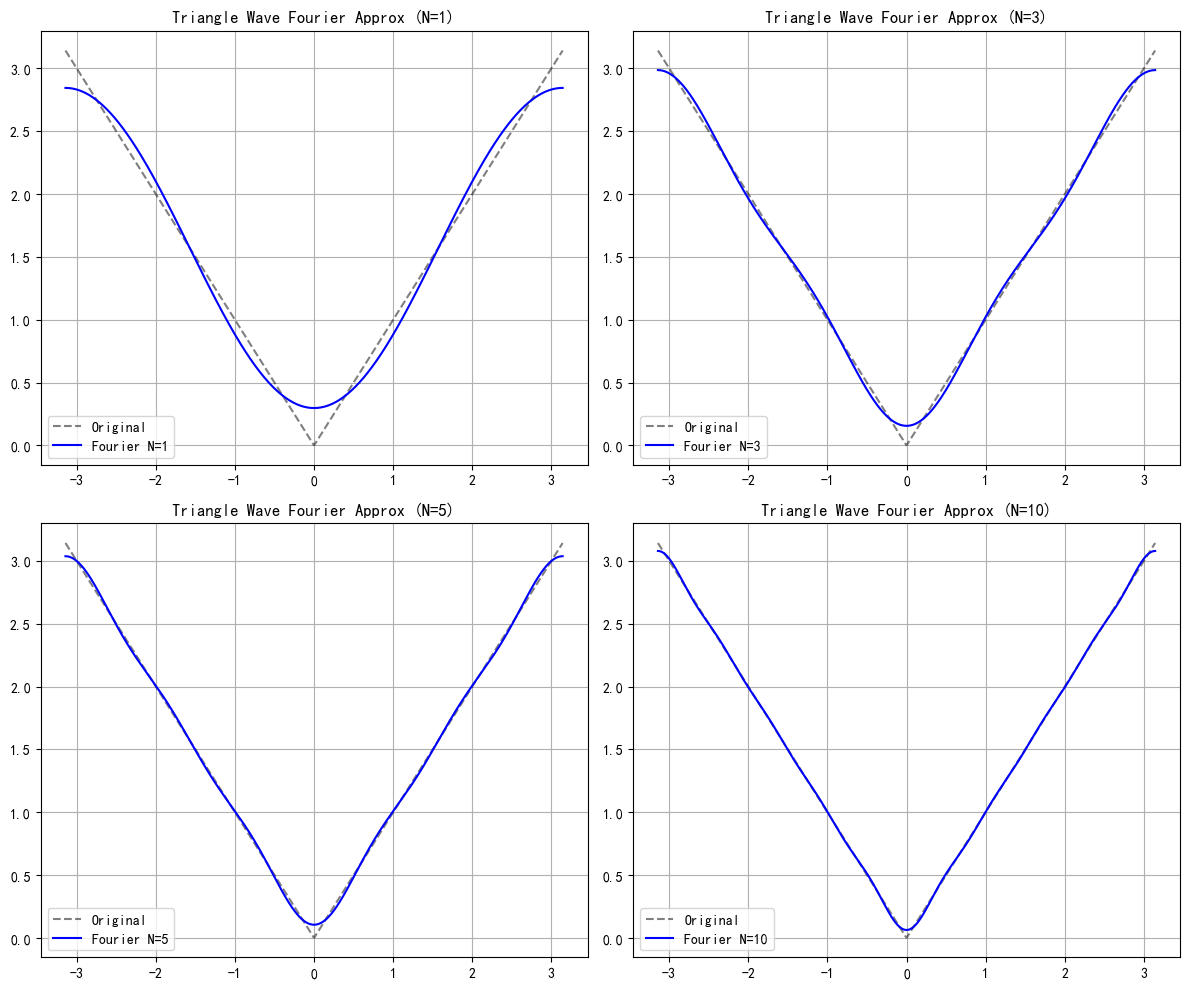

In [9]:
# 定义三角波函数 (周期 2pi, [-pi, pi] 上为 |x|)
def triangle_wave(x):
    # 映射到 [-pi, pi]
    x = (x + np.pi) % (2 * np.pi) - np.pi
    return np.abs(x)

v_triangle_wave = np.vectorize(triangle_wave)

# 定义三角波的傅里叶级数近似
# a0 = pi/2
# an = -4/(pi*n^2) for odd n
# bn = 0
def fourier_triangle_approx(x, N):
    result = np.pi / 2
    for n in range(1, N + 1, 2):
        an = -4 / (np.pi * n**2)
        result += an * np.cos(n * x)
    return result

# 绘图
x_vals_tri = np.linspace(-np.pi, np.pi, 1000)
original_y_tri = v_triangle_wave(x_vals_tri)

N_values_tri = [1, 3, 5, 10]

plt.figure(figsize=(12, 10))

for i, N in enumerate(N_values_tri):
    plt.subplot(2, 2, i+1)
    approx_y = fourier_triangle_approx(x_vals_tri, N)
    plt.plot(x_vals_tri, original_y_tri, 'k--', label='Original', alpha=0.5)
    plt.plot(x_vals_tri, approx_y, 'b-', label=f'Fourier N={N}')
    plt.title(f'Triangle Wave Fourier Approx (N={N})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## 3. 简单信号合成
目标：
* 生成 $s(t) = \sin(2\pi \cdot 3t) + 0.5\sin(2\pi \cdot 7t) + 0.3\sin(2\pi \cdot 11t)$
* 绘制 $t \in [0, 2]$ 的波形
* FFT 分析并绘制频谱

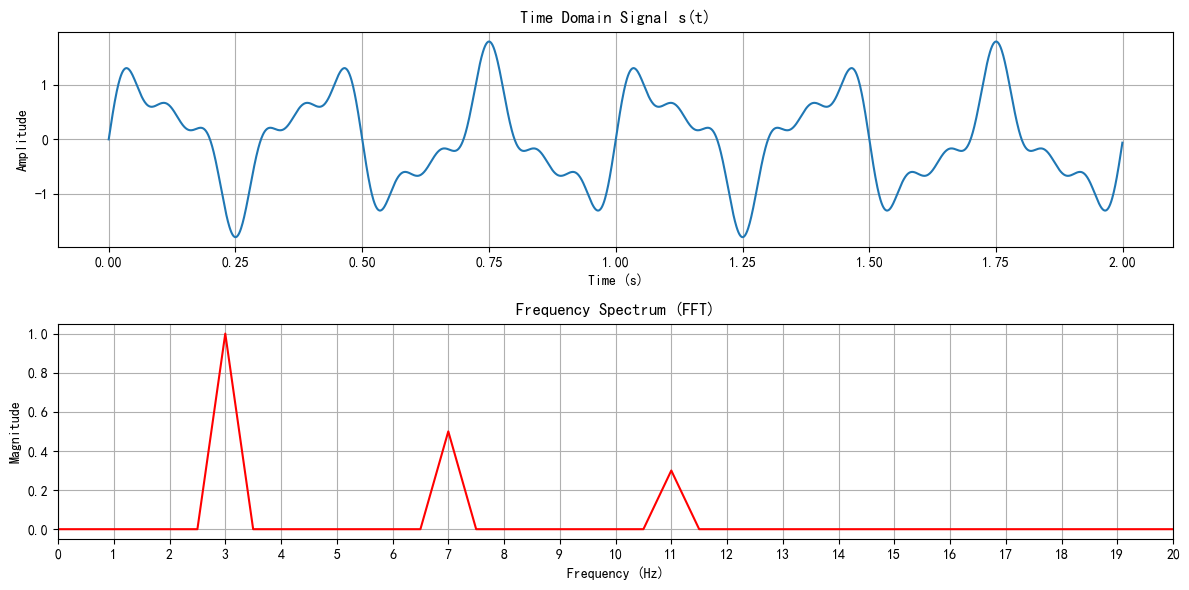

检测到的主要频率成分:
频率: 3.0 Hz, 幅度: 1.00
频率: 7.0 Hz, 幅度: 0.50
频率: 11.0 Hz, 幅度: 0.30


In [10]:
from scipy.fft import fft, fftfreq

# 定义信号
def signal_s(t):
    return np.sin(2 * np.pi * 3 * t) + 0.5 * np.sin(2 * np.pi * 7 * t) + 0.3 * np.sin(2 * np.pi * 11 * t)

# 时间轴
sampling_rate = 1000 # 采样率
duration = 2.0       # 持续时间
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
s_values = signal_s(t)

# 绘制时域波形
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, s_values)
plt.title('Time Domain Signal s(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# FFT 分析
N_fft = len(t)
yf = fft(s_values)
xf = fftfreq(N_fft, 1 / sampling_rate)

# 取正频率部分
idx = np.where(xf >= 0)
xf_pos = xf[idx]
yf_pos_abs = np.abs(yf[idx]) / N_fft * 2 # 归一化幅度

# 绘制频谱
plt.subplot(2, 1, 2)
plt.plot(xf_pos, yf_pos_abs, 'r-')
plt.xlim(0, 20) # 限制显示范围以便看清低频分量
plt.title('Frequency Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xticks(np.arange(0, 21, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# 验证频率成分截图
print("检测到的主要频率成分:")
peak_indices = np.where(yf_pos_abs > 0.1)[0]
for i in peak_indices:
    print(f"频率: {xf_pos[i]:.1f} Hz, 幅度: {yf_pos_abs[i]:.2f}")